In [2]:
import iohinspector
import os

In [3]:
manager = iohinspector.DataManager()
data_folders = ["test_data/RS"]
manager.add_folders(data_folders)

manager.overview
print(manager.overview)
selection = manager.select(function_ids=[1], algorithms=['RandomSearch'])
df = selection.load(monotonic=True, include_meta_data=True,)

result = iohinspector.data_processing.aggregate_convergence(df)
result.to_csv("aggregated_result.csv", index=False)

print(result)




shape: (30, 11)
┌─────────┬──────────────┬──────────────┬──────────────┬───┬──────────┬────────┬───────┬───────────┐
│ data_id ┆ algorithm_na ┆ algorithm_in ┆ suite        ┆ … ┆ instance ┆ run_id ┆ evals ┆ best_y    │
│ ---     ┆ me           ┆ fo           ┆ ---          ┆   ┆ ---      ┆ ---    ┆ ---   ┆ ---       │
│ u64     ┆ ---          ┆ ---          ┆ str          ┆   ┆ u16      ┆ u32    ┆ u64   ┆ f64       │
│         ┆ str          ┆ str          ┆              ┆   ┆          ┆        ┆       ┆           │
╞═════════╪══════════════╪══════════════╪══════════════╪═══╪══════════╪════════╪═══════╪═══════════╡
│ 1       ┆ RandomSearch ┆ algorithm_in ┆ unknown_suit ┆ … ┆ 1        ┆ 1      ┆ 1000  ┆ 47.150496 │
│         ┆              ┆ fo           ┆ e            ┆   ┆          ┆        ┆       ┆           │
│ 2       ┆ RandomSearch ┆ algorithm_in ┆ unknown_suit ┆ … ┆ 2        ┆ 2      ┆ 1000  ┆ 41.120049 │
│         ┆              ┆ fo           ┆ e            ┆   ┆          ┆    

AttributeError: module 'iohinspector' has no attribute 'data_processing'

,raw_y,algorithm_name,variable,value
350,0.003647,RandomSearch,ERT,12270.000000
377,0.943782,RandomSearch,ERT,53.133333
378,1.159419,RandomSearch,ERT,37.533333
379,1.424324,RandomSearch,ERT,25.466667
380,1.749754,RandomSearch,ERT,19.066667
381,2.149540,RandomSearch,ERT,17.266667
382,2.640669,RandomSearch,ERT,13.333333
383,3.244012,RandomSearch,ERT,12.466667
384,3.985206,RandomSearch,ERT,8.066667
385,4.895750,RandomSearch,ERT,4.933333


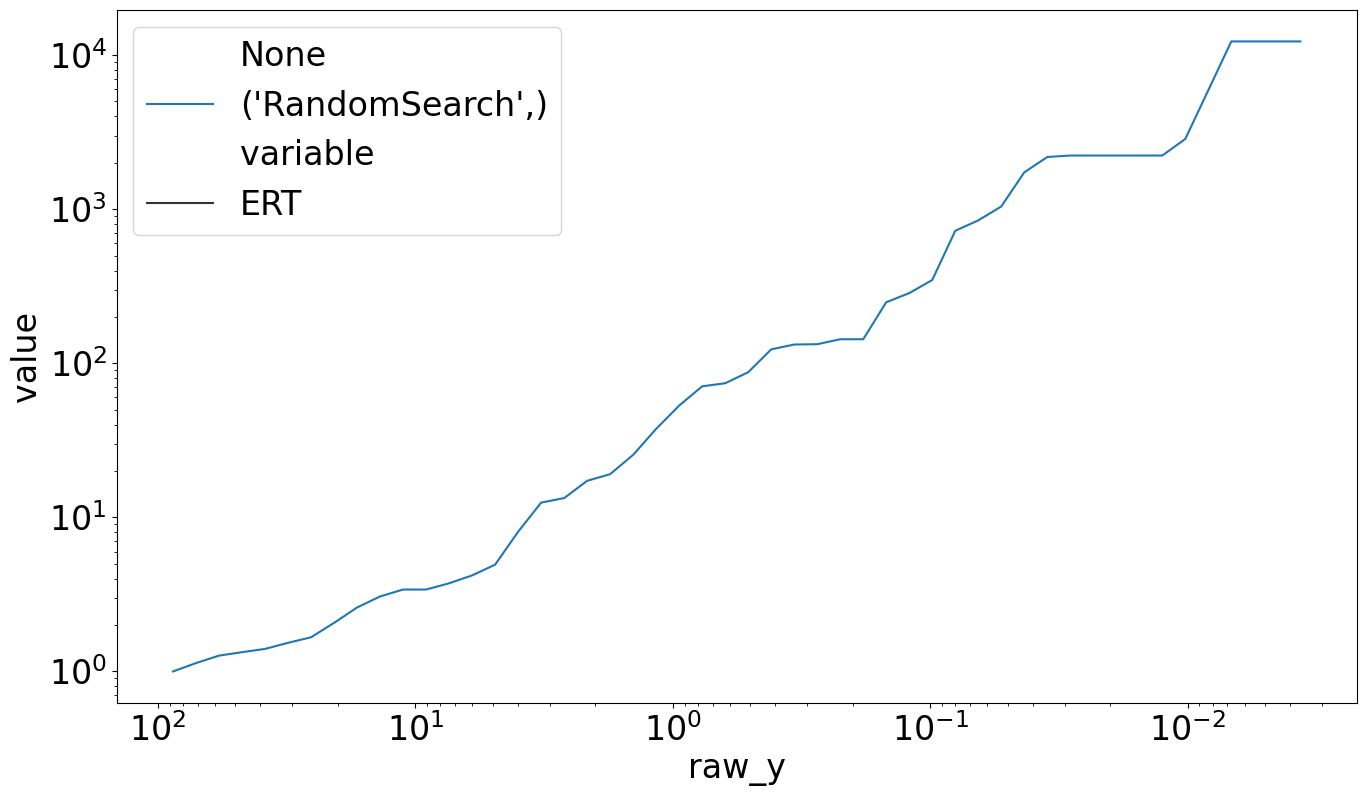

In [ ]:
iohinspector.single_function_fixedtarget(df)

    evaluations algorithm_name  data_id algorithm_info suite function_name  \
0           1.0   RandomSearch     23.0           None  None          None   
1           2.0   RandomSearch     23.0           None  None          None   
2           3.0   RandomSearch     23.0           None  None          None   
3           4.0   RandomSearch     23.0           None  None          None   
4           5.0   RandomSearch     23.0           None  None          None   
5           6.0   RandomSearch     23.0           None  None          None   
6           7.0   RandomSearch     23.0           None  None          None   
7           9.0   RandomSearch     23.0           None  None          None   
8          10.0   RandomSearch     23.0           None  None          None   
9          11.0   RandomSearch     23.0           None  None          None   
10         13.0   RandomSearch     23.0           None  None          None   
11         15.0   RandomSearch     23.0           None  None    

/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/iohinspector/align.py:109: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  result_df = x_vals.join_asof(


,evaluations,algorithm_name,data_id,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,raw_y,x0,x1,eaf
0,1,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,25.374196,-0.344009,0.512334,0.433702
1,2,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,16.547486,-1.339305,1.030883,0.444280
2,3,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,13.520373,-0.852911,0.122410,0.450709
3,4,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,8.487365,0.031484,-0.732846,0.463598
4,5,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,4.720136,-0.327776,-0.388880,0.471247
5,6,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,4.562542,-0.061125,-0.570694,0.471938
6,7,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,4.365324,0.039378,-0.727321,0.474602
7,9,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,2.460843,-0.279667,-0.614688,0.485548
8,10,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,2.195116,-0.170377,-0.543626,0.489064
9,11,RandomSearch,23.0,None,None,None,1.0,2.0,8.0,8.0,1000.0,0.050848,2.149442,-0.099207,-0.475165,0.489552


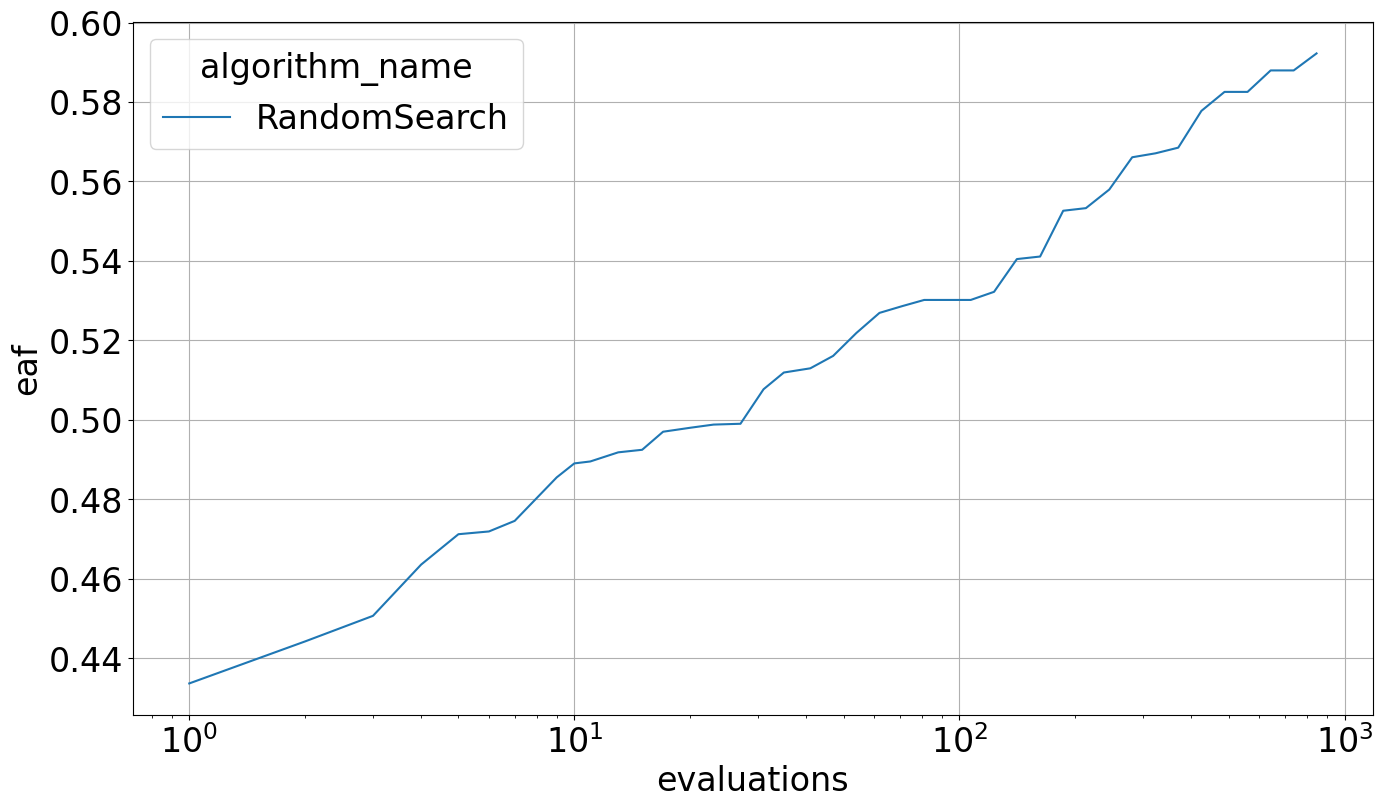

In [ ]:
data = iohinspector.get_data_ecdf(
    df
)
print(data)
data.to_csv("ecdf_data.csv", index=False)
iohinspector.plot_ecdf(
    df,
    y_min = 1.0,
    y_max = 1.0,
)

In [ ]:


result = iohinspector.aggegate_convergence(df, free_variables=["algorithm_name"])
result.to_csv("aggregated_result.csv", index=False)

print(result)



thread '<unnamed>' panicked at crates/polars-python/src/dataframe/general.rs:351:73:
called `Result::unwrap()` on an `Err` value: PyErr { type: <class 'KeyboardInterrupt'>, value: KeyboardInterrupt(), traceback: Some("Traceback (most recent call last):\n  File \"/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/polars/_utils/wrap.py\", line 12, in wrap_df\n    def wrap_df(df: PyDataFrame) -> DataFrame:\n") }
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: called `Result::unwrap()` on an `Err` value: PyErr { type: <class 'KeyboardInterrupt'>, value: KeyboardInterrupt(), traceback: Some("Traceback (most recent call last):\n  File \"/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/polars/_utils/wrap.py\", line 12, in wrap_df\n    def wrap_df(df: PyDataFrame) -> DataFrame:\n") }

,evaluations,algorithm_name,variable,value
170,1.0,RandomSearch,geometric_mean,11.502018
201,82.0,RandomSearch,geometric_mean,0.328777
200,75.0,RandomSearch,geometric_mean,0.344017
199,68.0,RandomSearch,geometric_mean,0.349327
198,62.0,RandomSearch,geometric_mean,0.370701
197,56.0,RandomSearch,geometric_mean,0.425972
196,51.0,RandomSearch,geometric_mean,0.462630
195,47.0,RandomSearch,geometric_mean,0.552266
194,42.0,RandomSearch,geometric_mean,0.619678
193,39.0,RandomSearch,geometric_mean,0.619678


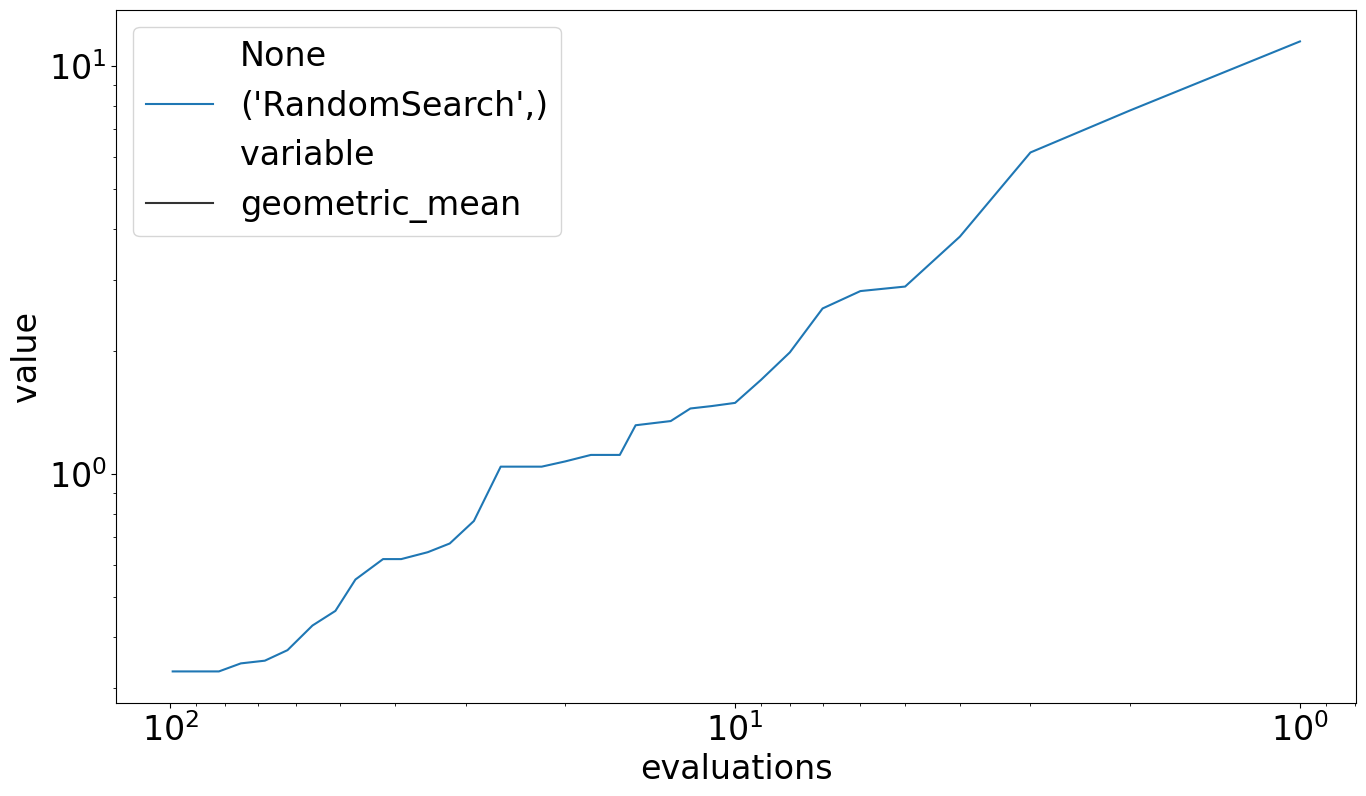

In [ ]:
iohinspector.single_function_fixedbudget(
    df,
    x_min = 1,
    x_max = 100,
    
)

In [ ]:
print(df["data_id"].unique())
df_one_run = df.filter(df["data_id"] == 16)
print(df_one_run["run_id"].unique())
# iohinspector.heatmap_single_run(
#     df_one_run,
#     var_cols=["x1"],
#     x_mins=[-5]*len(df_one_run["x1"]),
#     x_maxs=[5]*len(df_one_run["x1"])
#     )


shape: (15,)
Series: 'data_id' [u64]
[
	16
	17
	18
	19
	20
	…
	26
	27
	28
	29
	30
]
shape: (1,)
Series: 'run_id' [u32]
[
	1
]


In [ ]:
manager = iohinspector.DataManager()
data_folders = ["test_data/RS", "test_data/HC"]
manager.add_folders(data_folders)


print(manager.overview.columns)
selection = manager.select(function_ids=[1])
df = selection.load(monotonic=True, include_meta_data=True,)

print(df)
result = iohinspector.aggegate_running_time(df, free_variables=["run_id"])
result.to_csv("aggregated_result.csv", index=False)

print(result)


['data_id', 'algorithm_name', 'algorithm_info', 'suite', 'function_name', 'function_id', 'dimension', 'instance', 'run_id', 'evals', 'best_y']
shape: (327, 15)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ data_id ┆ algorithm_ ┆ algorithm ┆ suite     ┆ … ┆ evaluatio ┆ raw_y     ┆ x0        ┆ x1        │
│ ---     ┆ name       ┆ _info     ┆ ---       ┆   ┆ ns        ┆ ---       ┆ ---       ┆ ---       │
│ u64     ┆ ---        ┆ ---       ┆ str       ┆   ┆ ---       ┆ f64       ┆ f64       ┆ f64       │
│         ┆ str        ┆ str       ┆           ┆   ┆ u64       ┆           ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 16      ┆ RandomSear ┆ algorithm ┆ unknown_s ┆ … ┆ 1         ┆ 23.543464 ┆ 4.758863  ┆ 0.642882  │
│         ┆ ch         ┆ _info     ┆ uite      ┆   ┆           ┆           ┆           ┆           │
│ 16      ┆ RandomSear ┆ algorit

,Rating,Deviation,algorithm_name
0,1481.847229,6.719253,RandomSearch
1,1518.152771,6.719253,HillClimber


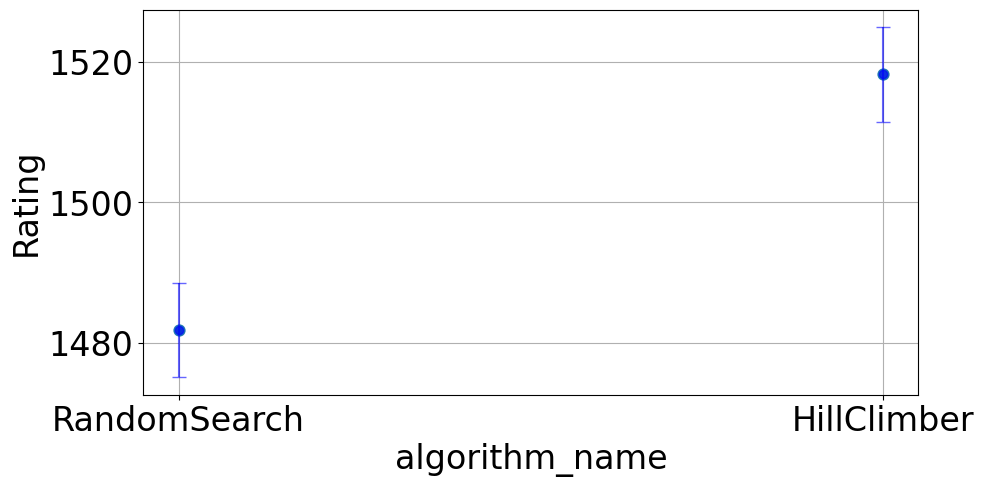

In [ ]:
iohinspector.plot_tournament_ranking(df)


In [ ]:
manager = iohinspector.DataManager()
data_folders = ["test_data/RS", "test_data/HC"]
manager.add_folders(data_folders)


print(manager.overview.columns)
selection = manager.select()
df = selection.load(monotonic=True, include_meta_data=True,)

print(df)
result = iohinspector.aggegate_running_time(df, free_variables=["run_id"])
result.to_csv("aggregated_result.csv", index=False)


['data_id', 'algorithm_name', 'algorithm_info', 'suite', 'function_name', 'function_id', 'dimension', 'instance', 'run_id', 'evals', 'best_y']
shape: (599, 15)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ data_id ┆ algorithm_ ┆ algorithm ┆ suite     ┆ … ┆ evaluatio ┆ raw_y     ┆ x0        ┆ x1        │
│ ---     ┆ name       ┆ _info     ┆ ---       ┆   ┆ ns        ┆ ---       ┆ ---       ┆ ---       │
│ u64     ┆ ---        ┆ ---       ┆ str       ┆   ┆ ---       ┆ f64       ┆ f64       ┆ f64       │
│         ┆ str        ┆ str       ┆           ┆   ┆ u64       ┆           ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ RandomSear ┆ algorithm ┆ unknown_s ┆ … ┆ 1         ┆ 8.2124e6  ┆ -0.530698 ┆ -2.494956 │
│         ┆ ch         ┆ _info     ┆ uite      ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ RandomSear ┆ algorit

,raw_y,algorithm_name,function_id,variable,value
1401,6.490770e-05,HillClimber,1,ERT,14496.000000
1404,1.134130e-04,HillClimber,1,ERT,14496.000000
1410,1.981660e-04,HillClimber,1,ERT,14496.000000
1415,3.462546e-04,HillClimber,1,ERT,4688.333333
1418,6.050093e-04,HillClimber,1,ERT,2686.000000
...,...,...,...,...,...
1582,5.233434e+06,RandomSearch,2,ERT,2.800000
1585,9.144358e+06,RandomSearch,2,ERT,2.133333
1588,1.597790e+07,RandomSearch,2,ERT,1.733333
1595,2.791812e+07,RandomSearch,2,ERT,1.200000


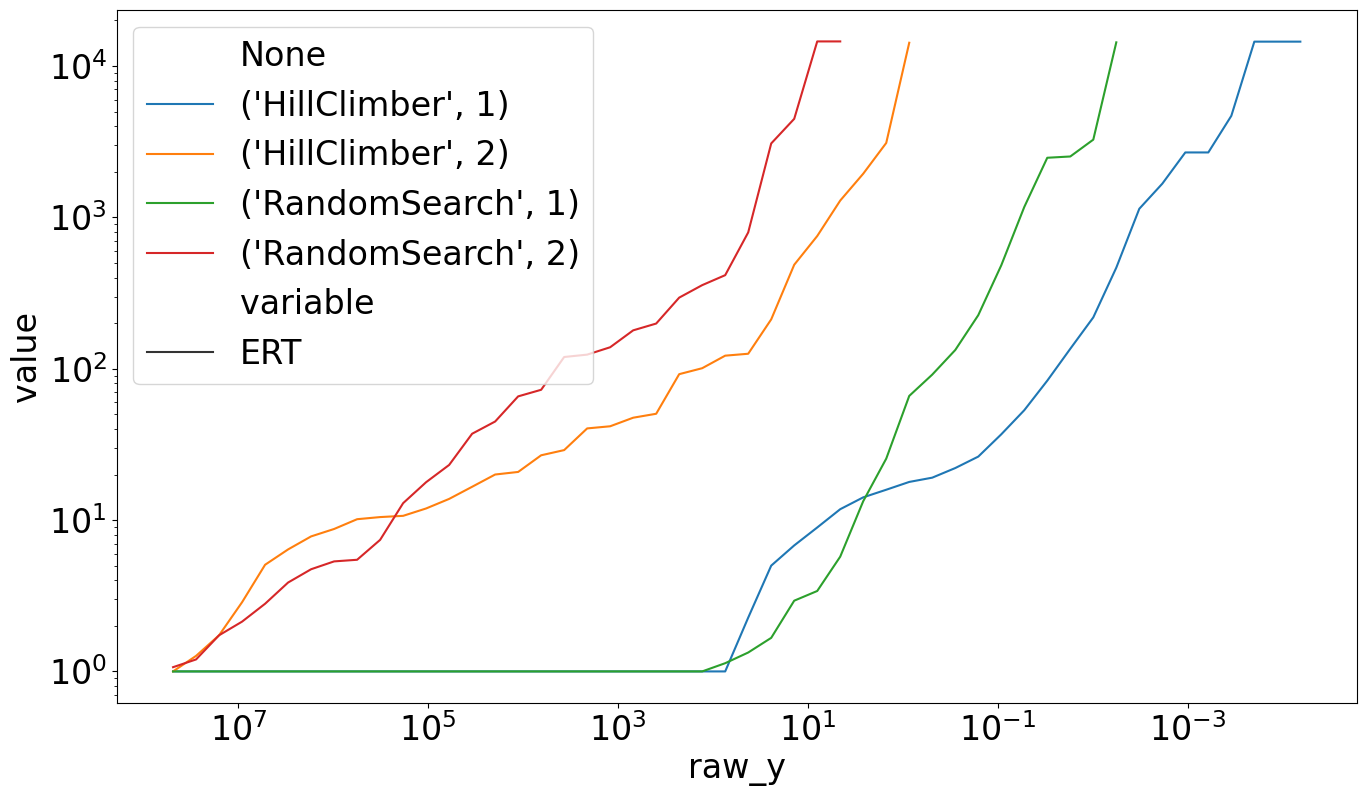

In [ ]:
iohinspector.single_function_fixedtarget(
    df,
    free_variables=["algorithm_name","function_id"],)

,evaluations,algorithm_name,function_id,variable,value
843,1.0,HillClimber,1,geometric_mean,17.691640
847,2.0,HillClimber,1,geometric_mean,14.095624
851,3.0,HillClimber,1,geometric_mean,11.517027
855,4.0,HillClimber,1,geometric_mean,8.645013
857,5.0,HillClimber,1,geometric_mean,7.502348
...,...,...,...,...,...
991,566.0,RandomSearch,2,geometric_mean,48.534221
995,652.0,RandomSearch,2,geometric_mean,39.839912
996,750.0,RandomSearch,2,geometric_mean,36.944067
1002,864.0,RandomSearch,2,geometric_mean,27.835512


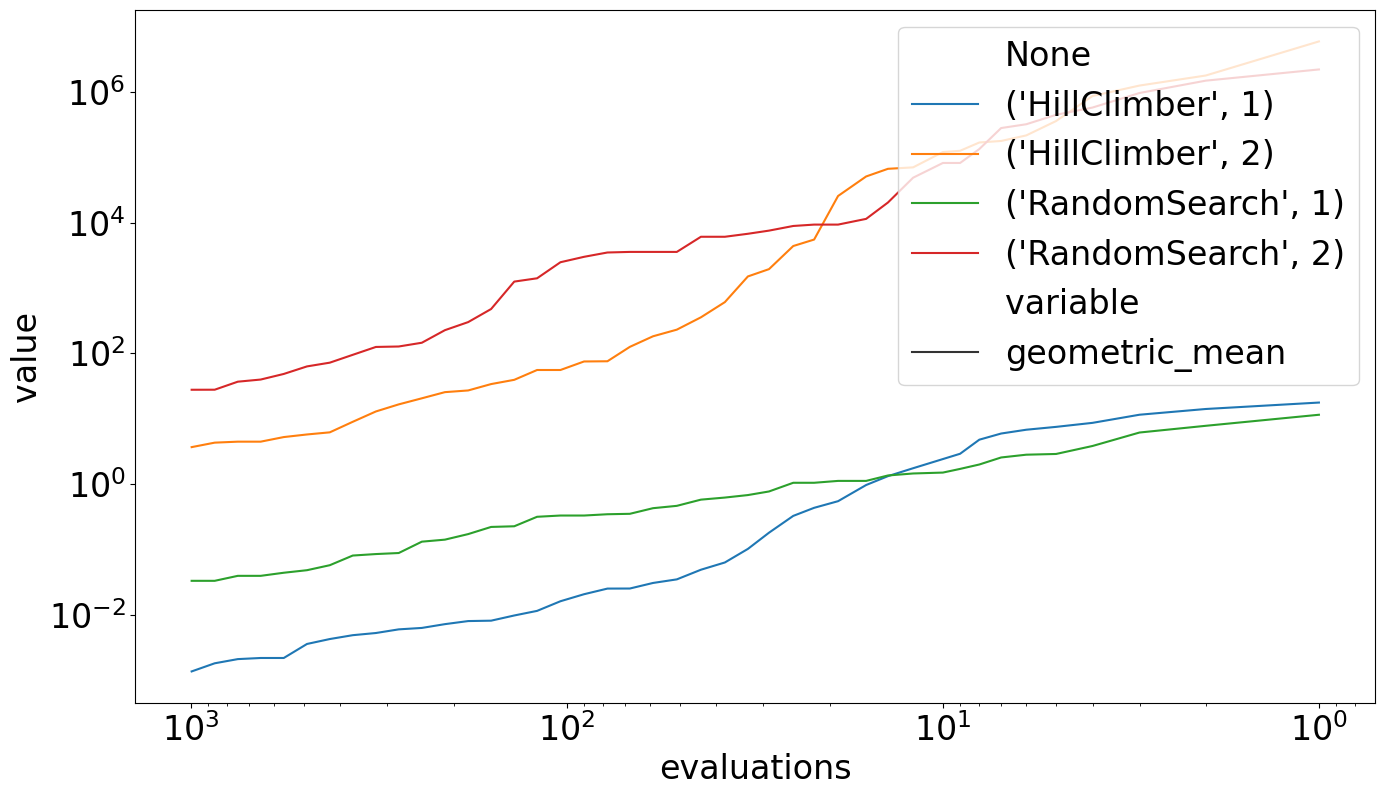

In [ ]:
iohinspector.single_function_fixedbudget(
    df,
    free_variables=["algorithm_name","function_id"],)

evaluations,data_id,algorithm_name,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,raw_y,x0,x1
f64,i32,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,53,"""HillClimber""","""algorithm_info""","""unknown_suite""","""Sphere""",1.0,2.0,8.0,8.0,1000.0,0.00191,58.635203,-4.888823,3.862607
2.0,53,"""HillClimber""","""algorithm_info""","""unknown_suite""","""Sphere""",1.0,2.0,8.0,8.0,1000.0,0.00191,48.239593,-3.818579,5.0
3.0,53,"""HillClimber""","""algorithm_info""","""unknown_suite""","""Sphere""",1.0,2.0,8.0,8.0,1000.0,0.00191,45.920072,-3.638926,4.993428
4.0,53,"""HillClimber""","""algorithm_info""","""unknown_suite""","""Sphere""",1.0,2.0,8.0,8.0,1000.0,0.00191,39.832259,-3.383065,4.335506
5.0,53,"""HillClimber""","""algorithm_info""","""unknown_suite""","""Sphere""",1.0,2.0,8.0,8.0,1000.0,0.00191,33.091874,-2.618086,4.776682
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
566.0,40,"""HillClimber""","""algorithm_info""","""unknown_suite""","""Ellipsoid""",2.0,2.0,10.0,10.0,1000.0,2.532531,2.532531,0.999527,1.384652
652.0,40,"""HillClimber""","""algorithm_info""","""unknown_suite""","""Ellipsoid""",2.0,2.0,10.0,10.0,1000.0,2.532531,2.532531,0.999527,1.384652
750.0,40,"""HillClimber""","""algorithm_info""","""unknown_suite""","""Ellipsoid""",2.0,2.0,10.0,10.0,1000.0,2.532531,2.532531,0.999527,1.384652


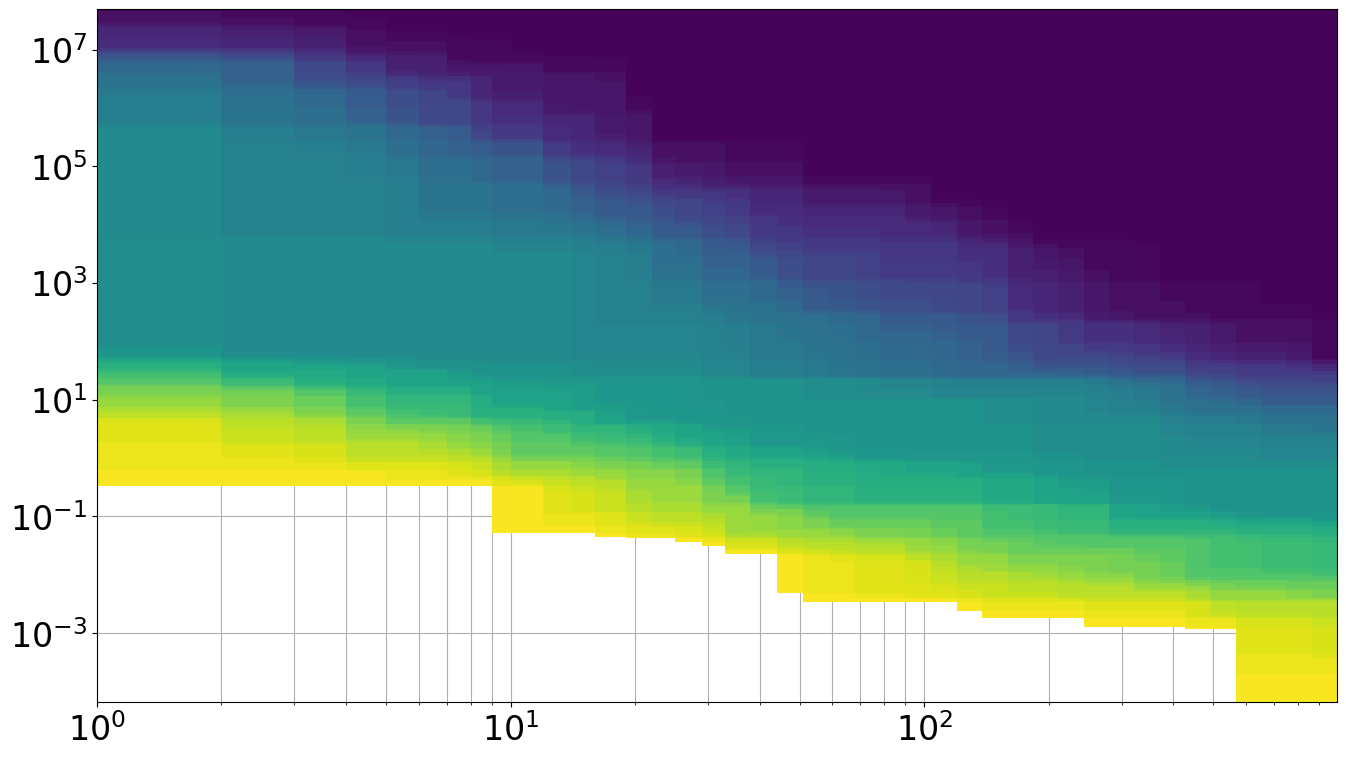

In [ ]:
iohinspector.plot_eaf_singleobj(df)

/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/iohinspector/align.py:109: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  result_df = x_vals.join_asof(


,evaluations,algorithm_name,data_id,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,raw_y,x0,x1,eaf
0,1,HillClimber,45.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,2.978676,5.310570e+06,-0.322544,0.663383,0.249110
1,1,RandomSearch,15.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,21.927541,6.188412e+06,-0.192598,0.201141,0.268371
2,2,RandomSearch,15.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,21.927541,4.848309e+06,-1.131930,0.486360,0.279032
3,2,HillClimber,45.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,2.978676,4.604357e+06,-0.206025,0.657047,0.268522
4,3,RandomSearch,15.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,21.927541,3.281761e+06,-0.698483,-0.066725,0.288152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,750,RandomSearch,15.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,21.927541,3.813746e+01,-0.607788,-0.377945,0.494987
80,864,HillClimber,45.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,2.978676,3.565133e+00,-0.282064,-0.420676,0.566046
81,864,RandomSearch,15.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,21.927541,2.194865e+01,-0.681759,-0.377316,0.501213
82,995,RandomSearch,15.5,None,None,None,1.5,2.0,8.0,8.0,1000.0,21.927541,2.192754e+01,-0.593897,-0.377214,0.501236


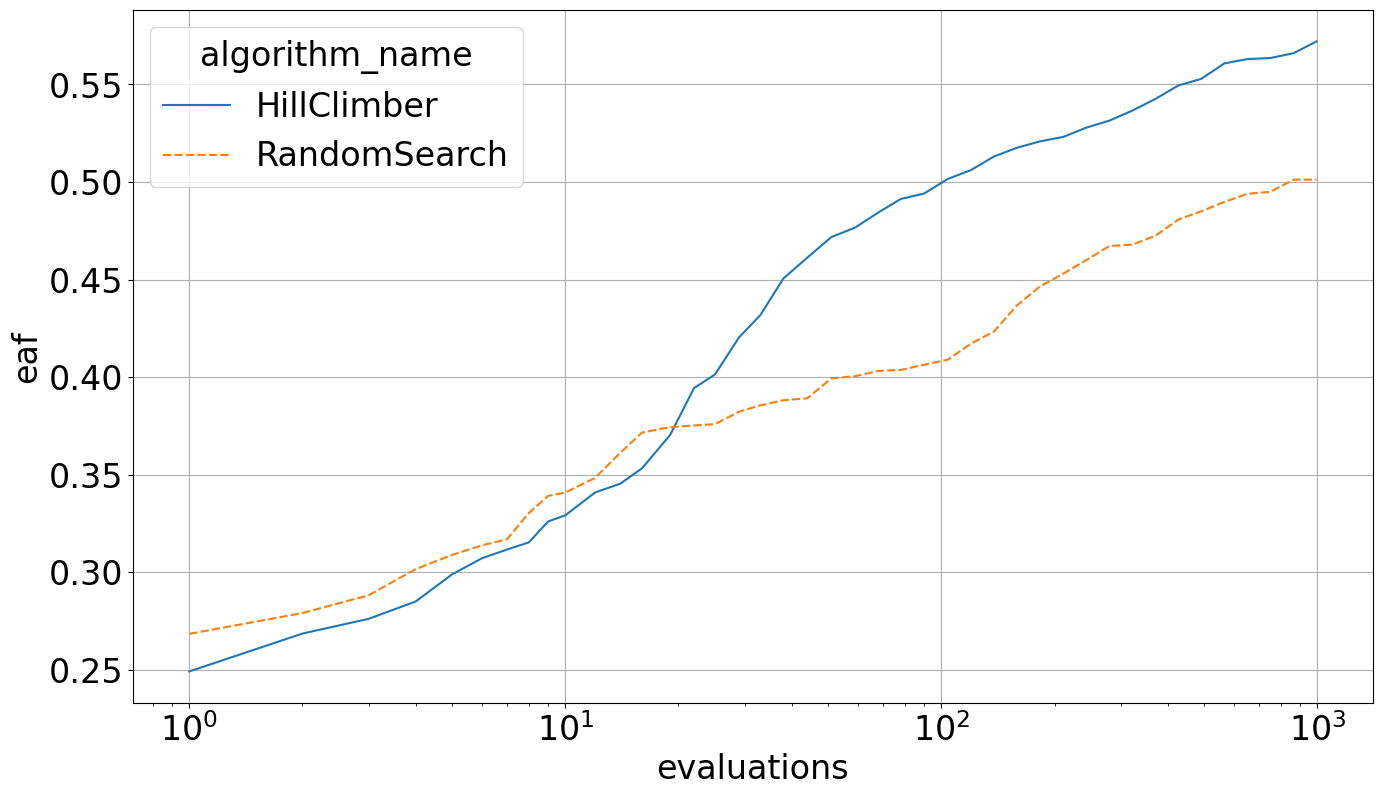

In [ ]:
iohinspector.plot_ecdf(
    df,
    free_vars=["algorithm_name"],)

shape: (368, 15)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ data_id ┆ algorithm_ ┆ algorithm ┆ suite     ┆ … ┆ evaluatio ┆ raw_y     ┆ x0        ┆ x1        │
│ ---     ┆ name       ┆ _info     ┆ ---       ┆   ┆ ns        ┆ ---       ┆ ---       ┆ ---       │
│ u64     ┆ ---        ┆ ---       ┆ str       ┆   ┆ ---       ┆ f64       ┆ f64       ┆ f64       │
│         ┆ str        ┆ str       ┆           ┆   ┆ u64       ┆           ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 31      ┆ HillClimbe ┆ algorithm ┆ unknown_s ┆ … ┆ 1         ┆ 1.5800e7  ┆ 3.262506  ┆ 4.431918  │
│         ┆ r          ┆ _info     ┆ uite      ┆   ┆           ┆           ┆           ┆           │
│ 31      ┆ HillClimbe ┆ algorithm ┆ unknown_s ┆ … ┆ 2         ┆ 7.4589e6  ┆ 3.215108  ┆ 3.085552  │
│         ┆ r          ┆ _info     ┆ uite      ┆   ┆           ┆          

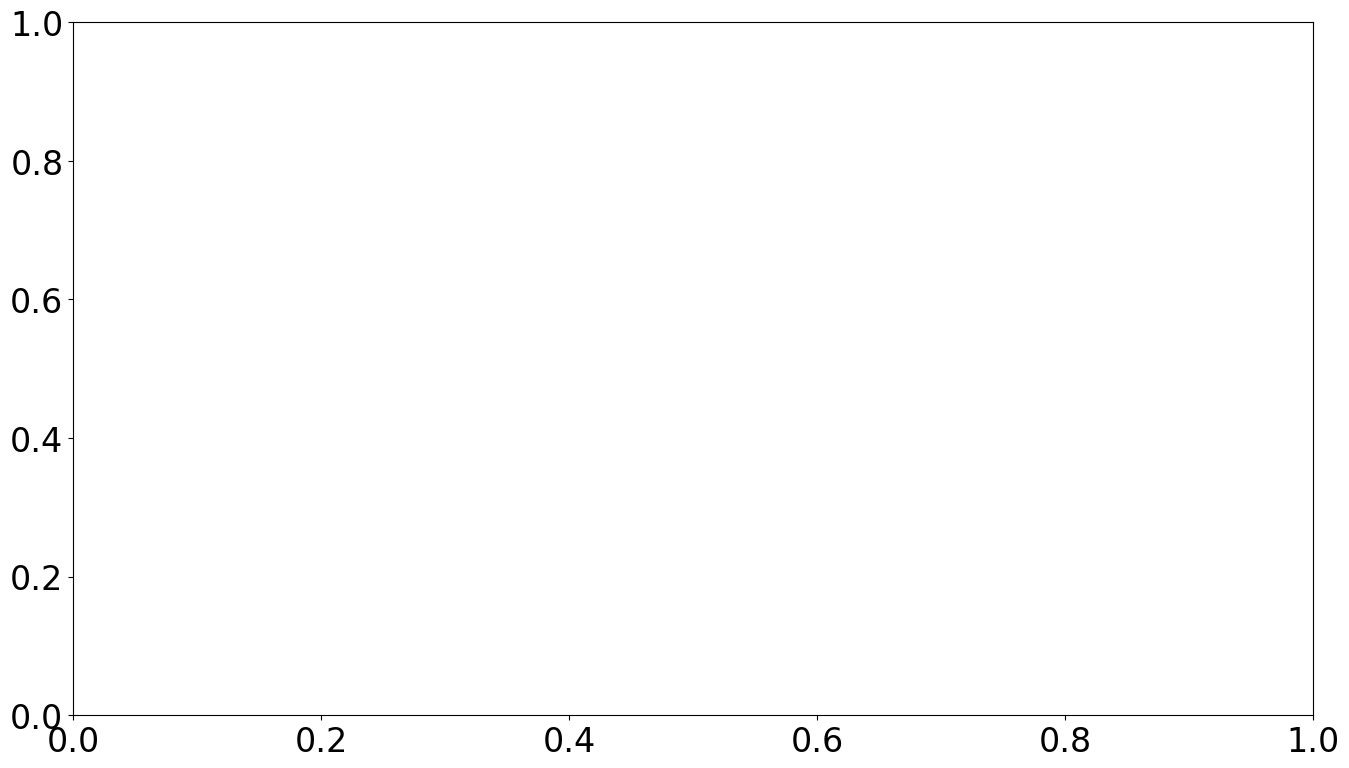

In [ ]:
# Select HillClimber data
hc_data = df.filter(df["algorithm_name"] == "HillClimber")

# Select RandomSearch data
rs_data = df.filter(df["algorithm_name"] == "RandomSearch")
print(hc_data)
iohinspector.eaf_diffs(
    hc_data,
    rs_data,
    x_column="evaluations",
    y_column="raw_y",
    max_y=1
)


In [ ]:
import numpy as np
min = 5
max = 5 
len = 3
x = np.arange(
                min,
                max + (max - min) / (2 * (len - 1)),
                (max - min) / (len - 1),
                dtype=float,
            )
print(x)

ZeroDivisionError: float division by zero